# Developing a model for predicting f1 score 

**We are building a model for `RUMINATING STANDING` activities which can predict f1 score**

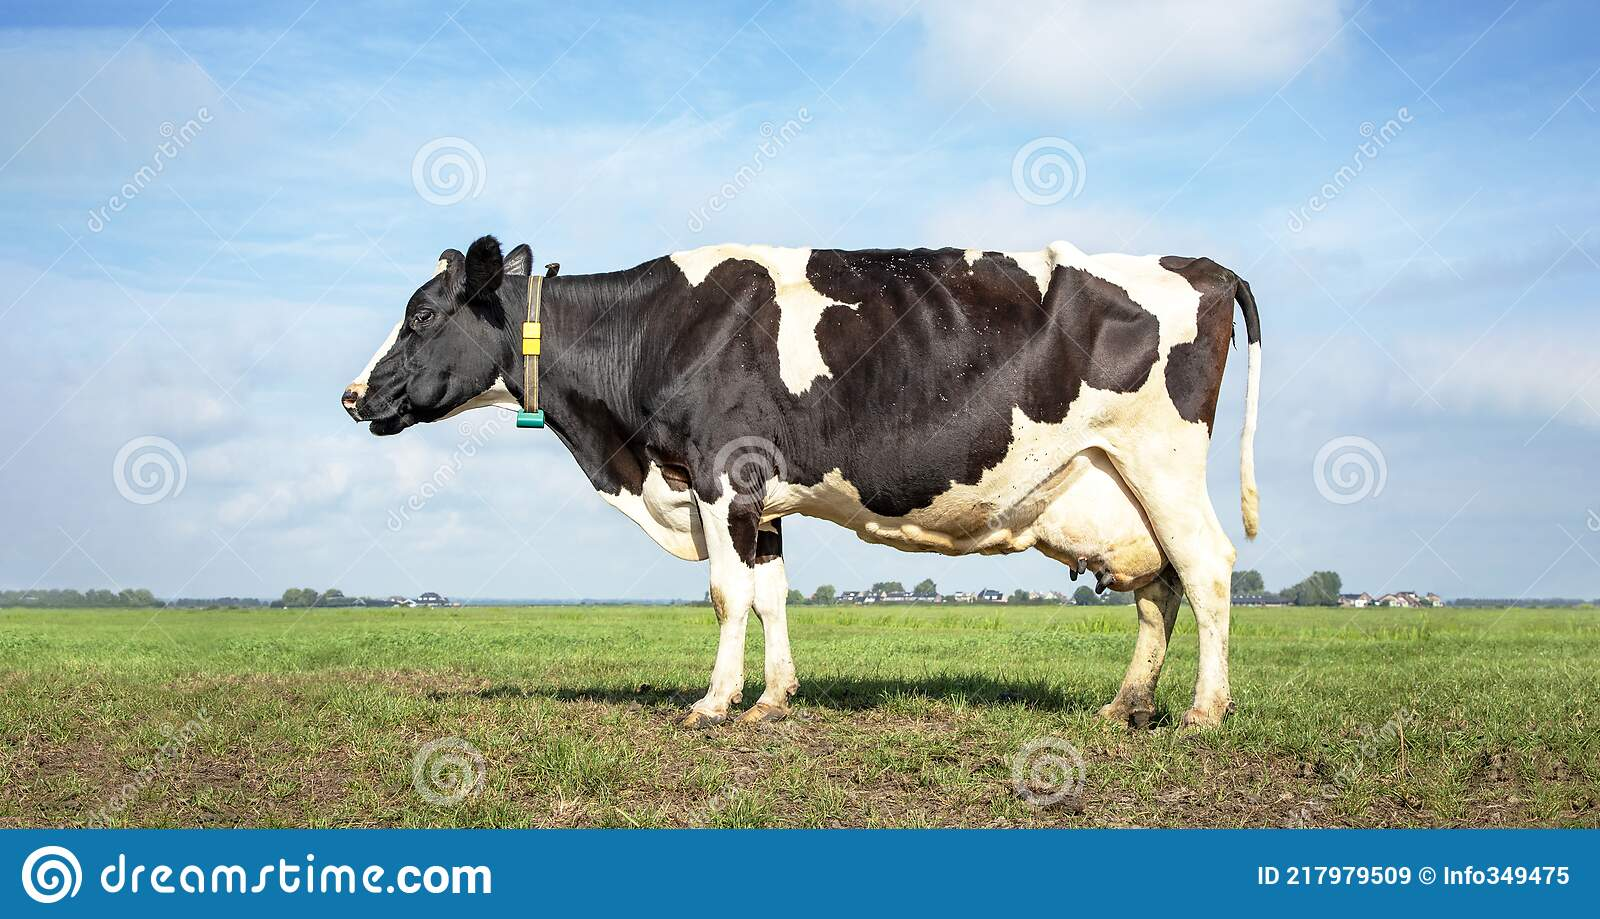

In [36]:
Image("stan.png", width=500,
    height=100)

In [34]:
#Importing tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

%matplotlib inline

In [2]:
#Importing dataset
df=pd.read_csv("RS6_train.csv")

In [3]:
df.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628307420,-0.175781,0.983887,0.185059,3.051758,26.916504,24.902344,-24.0,1395.0,333.0,6
1,1628307420,-0.160156,0.925781,0.188965,7.507324,23.559570,22.644043,-39.0,1375.5,342.0,6
2,1628307420,-0.163574,0.963867,0.168457,6.591797,22.521973,17.761230,-31.5,1401.0,336.0,6
3,1628307420,-0.192383,1.006836,0.143555,6.530762,23.254395,16.235352,-33.0,1387.5,334.5,6
4,1628307420,-0.226074,1.052246,0.137207,13.854980,29.296875,14.770508,-24.0,1405.5,343.5,6


In [5]:
df.dtypes

time       int64
acc_x    float64
acc_y    float64
acc_z    float64
gyr_x    float64
gyr_y    float64
gyr_z    float64
mag_x    float64
mag_y    float64
mag_z    float64
label      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703683 entries, 0 to 1703682
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 143.0 MB


In [8]:
df.isna().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

In [9]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,1.703683e+06,1.703683e+06,1.703683e+06,1.703683e+06,1.703683e+06,1.703683e+06,1.703683e+06,1.703683e+06,1.703683e+06,1.703683e+06,1703683.0
mean,1.628251e+09,-6.779869e-02,3.832360e-01,1.663544e-01,8.939007e-01,-1.780121e+00,-6.352234e-01,-2.013777e+02,1.565788e+02,1.309154e+02,6.0
std,1.124763e+05,1.457011e-01,8.891461e-01,1.140038e-01,1.124601e+01,1.893466e+01,8.668113e+00,1.960725e+02,6.041509e+02,3.962503e+02,0.0
min,1.628076e+09,-9.540527e+00,-9.731445e+00,-1.598682e+01,-1.992065e+03,-1.873230e+03,-1.999756e+03,-8.715000e+02,-7.545000e+02,-8.340000e+02,6.0
25%,1.628118e+09,-1.533203e-01,-9.389649e-01,1.069336e-01,-2.441406e+00,-6.225586e+00,-2.868652e+00,-3.240000e+02,-1.890000e+02,2.100000e+01,6.0
50%,1.628310e+09,-4.882810e-02,9.433594e-01,1.611328e-01,8.544922e-01,-1.892090e+00,-6.103516e-01,-2.115000e+02,7.350000e+01,2.295000e+02,6.0
75%,1.628334e+09,2.685550e-02,9.794922e-01,2.246094e-01,4.150391e+00,2.502441e+00,1.586914e+00,-1.020000e+02,6.465000e+02,4.410000e+02,6.0
max,1.628415e+09,8.053223e+00,4.528809e+00,1.132520e+01,1.999756e+03,1.999756e+03,1.445129e+03,7.650000e+02,1.504500e+03,1.146000e+03,6.0


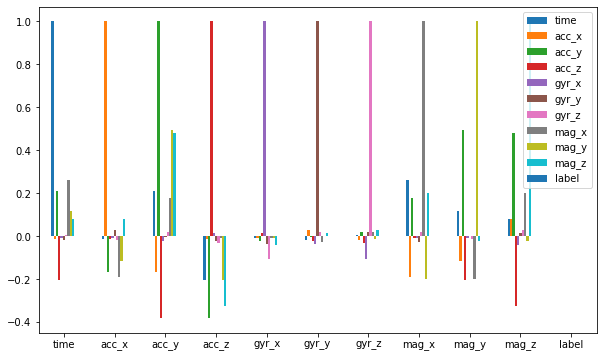

In [12]:
df.corr().plot(kind="bar",
              figsize=(10,6))
plt.xticks(rotation=0);

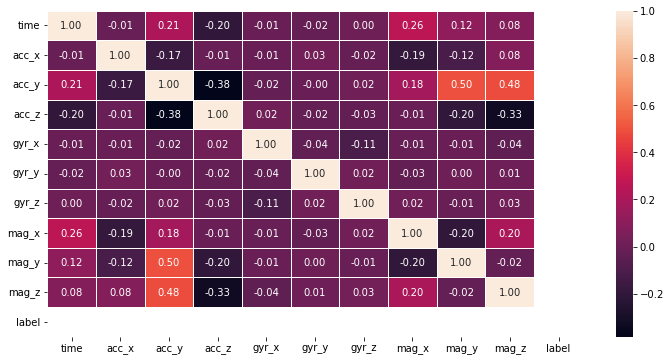

In [13]:
corr_mat = df.corr()
fig,ax=plt.subplots(figsize=(12,6))
ax=sns.heatmap(corr_mat,
              annot=True,
              linewidths=0.5,
              fmt='.2f')

In [15]:
#Importing train_test_split from sklearn model selection module 
from sklearn.model_selection import train_test_split


#Creating X & y labels
X=df.drop("label",axis=1)
y=df["label"]


#Spliiting the data  into traning and testing
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2)

In [16]:
X_train

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
570942,1628393693,-0.104492,-1.016113,0.213867,1.770020,0.061035,-3.662109,-277.5,57.0,-630.0
1304444,1628118257,0.084961,-0.978516,0.171387,-0.976563,-2.746582,-3.112793,-183.0,-675.0,307.5
1447765,1628309298,-0.005859,0.982910,0.113769,-1.586914,-0.122070,-2.136230,-177.0,138.0,285.0
1331325,1628119573,-0.134277,-0.918457,0.459961,-2.075195,1.892090,-5.187988,-147.0,-630.0,246.0
1202126,1628114016,-0.011230,-1.031250,0.210449,-4.150391,-4.943848,0.732422,-258.0,-630.0,22.5
...,...,...,...,...,...,...,...,...,...,...
1438532,1628308179,-0.125488,0.967285,0.115234,5.981445,3.723145,-2.685547,-577.5,154.5,201.0
42814,1628310484,-0.075195,1.021484,0.064941,0.427246,-4.211426,-2.319336,-106.5,1399.5,288.0
1086568,1628102687,-0.097656,0.967773,0.217285,-0.610352,2.929688,-2.136230,-192.0,85.5,151.5
1643906,1628108004,-0.184570,0.788086,-0.268066,1.342773,-12.145996,12.939453,-721.5,979.5,703.5


In [17]:
X_test

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
1475990,1628309876,0.033691,0.975098,0.090820,4.638672,2.990723,-1.831055,-256.5,136.5,201.0
587183,1628083864,-0.285156,0.917481,0.203613,-1.159668,-2.929688,1.403809,505.5,-297.0,436.5
1120596,1628107717,0.034180,1.061523,0.158203,-12.023926,-0.854492,-3.173828,-483.0,121.5,54.0
172325,1628394593,-0.083496,0.974121,0.120117,-1.892090,2.502441,3.417969,-183.0,1378.5,550.5
900295,1628395703,0.083496,0.977051,0.199219,3.051758,-4.150391,-5.310059,-160.5,-201.0,508.5
...,...,...,...,...,...,...,...,...,...,...
420600,1628310229,-0.084961,-1.025391,0.099609,1.953125,-15.808105,-0.061035,-241.5,12.0,-292.5
2029,1628307461,-0.187500,0.976563,0.232422,-2.075195,-12.145996,-7.385254,-142.5,1353.0,204.0
690664,1628311182,0.169434,1.003906,0.272461,10.620117,-3.234863,2.929688,94.5,-150.0,618.0
329782,1628134037,-0.175781,0.946777,0.132812,0.671387,10.131836,1.892090,-309.0,772.5,-370.5


In [18]:
y_train

570942     6
1304444    6
1447765    6
1331325    6
1202126    6
          ..
1438532    6
42814      6
1086568    6
1643906    6
98246      6
Name: label, Length: 1362946, dtype: int64

In [19]:
y_test

1475990    6
587183     6
1120596    6
172325     6
900295     6
          ..
420600     6
2029       6
690664     6
329782     6
1493121    6
Name: label, Length: 340737, dtype: int64

In [20]:
#Importing RandomforestRegressor from sklearn's ensamble module
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor()

In [21]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [22]:
clf.fit(X_test, y_test)

RandomForestRegressor()

In [23]:
clf.score(X_test,y_test)

1.0

In [24]:
clf.score(X_train,y_train)

1.0

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_pred

array([6., 6., 6., ..., 6., 6., 6.])

In [27]:
#Importing classification reports
from sklearn.metrics import classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           6       1.00      1.00      1.00    340737

    accuracy                           1.00    340737
   macro avg       1.00      1.00      1.00    340737
weighted avg       1.00      1.00      1.00    340737



In [29]:
#Importing f1 score from sklearn.metrics
from sklearn.metrics import f1_score

f1_score(y_test,y_pred,average="weighted")

1.0